# YOLOv8 Keypoint Detection / Pose Estimation

## Environment Preparation

In [1]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/YOLOv8/4_keypoint_detection

/content/drive/MyDrive/YOLOv8/4_keypoint_detection


In [4]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.7/78.2 GB disk)


## Test / Prediction

In [13]:
!yolo pose predict model=yolov8n-pose.pt source='https://www.arttablo.com/upload/U-bayan-kosucu-2-sporcu-fotograf-kanvas-tablo1467207911-800.jpg'

Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-pose summary (fused): 187 layers, 3,289,964 parameters, 0 gradients, 9.2 GFLOPs

100% 248k/248k [00:00<00:00, 731kB/s]
image 1/1 /content/drive/MyDrive/YOLOv8/4_keypoint_detection/U-bayan-kosucu-2-sporcu-fotograf-kanvas-tablo1467207911-800.jpg: 480x640 1 person, 304.8ms
Speed: 11.0ms preprocess, 304.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/pose/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


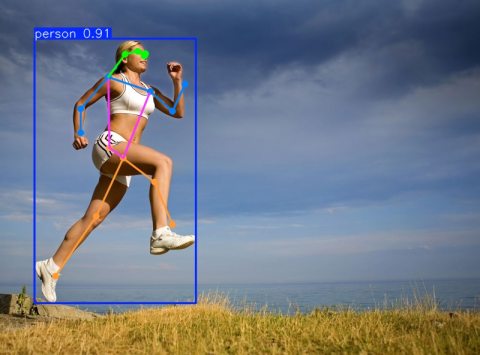

In [14]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

img_path="runs/pose/predict/test.jpg"

img=cv2.imread(img_path)
img=imutils.resize(img,width=480)

cv2_imshow(img)


image 1/1 /content/drive/MyDrive/YOLOv8/4_keypoint_detection/test.jpg: 480x640 1 person, 322.0ms
Speed: 12.8ms preprocess, 322.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


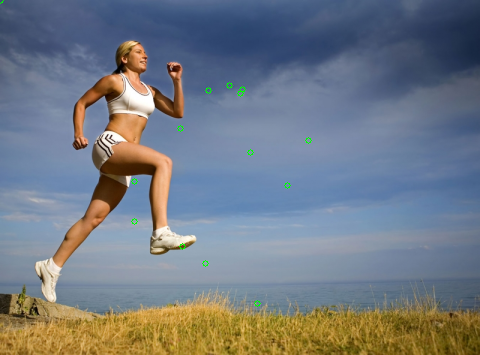

In [16]:
import cv2
import imutils
import numpy as np
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

img_path="test.jpg"
model_path="yolov8n-pose.pt"

img=cv2.imread(img_path)
img=imutils.resize(img,width=480)

model=YOLO(model_path)

results=model(img_path)[0]

for result in results:
  points=np.array(result.keypoints.xy.cpu(),dtype="int")
  for point in points:
    for p in point:
      cv2.circle(img,(p[0],p[1]),3,(0,255,0),1)

cv2_imshow(img)


## Training

TRAINING WITH COCO8 DATASET

In [5]:
!yolo pose train data=coco8-pose.yaml model=yolov8n-pose.pt epochs=25 imgsz=640 workers=8 batch=8 device=0 name=yolov8_pose_estimation

Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=pose, mode=train, model=yolov8n-pose.pt, data=coco8-pose.yaml, epochs=25, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8_pose_estimation, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

## Test/ Prediction

In [ ]:
!yolo pose predict model=yolov8n-pose.pt source="..."

In [ ]:
import cv2
import imutils
import numpy as np
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

img_path = "....."
model_path = "...."

img = cv2.imread(img_path)
img = imutils.resize(img, width=640)

model = YOLO(model_path)

results = model(img)[0]

for result in results:
  points = np.array(result.keypoints.xy.cpu(), dtype="int")
  for point in points:
    for p in point:
      cv2.circle(img, (p[0], p[1]), 3, (0,255,0), -1)

cv2_imshow(img)